In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

## Exploratory Data Analysis

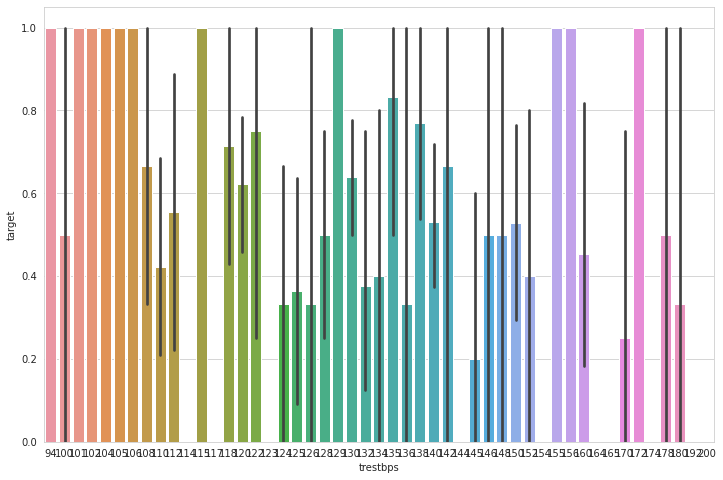

In [4]:
plt.figure(figsize=(12,8))
sns.barplot(y = df.target, x=df.trestbps)

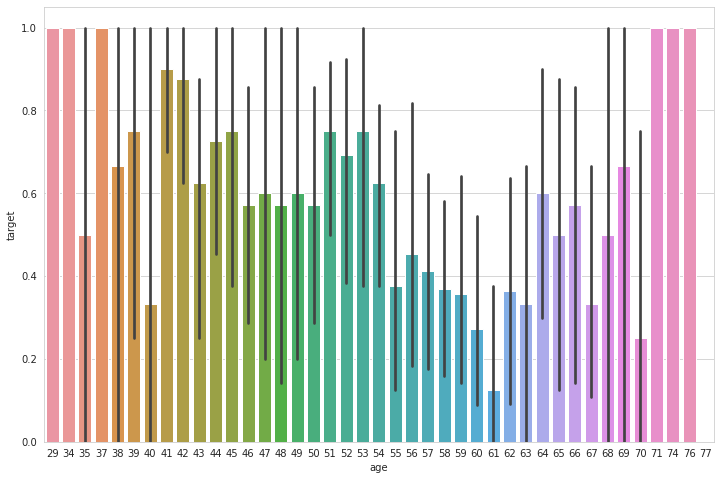

In [5]:
plt.figure(figsize=(12,8))
sns.barplot(y = df.target, x=df.age)

Observations made:

* All ages of people are subjected to heart dieases.

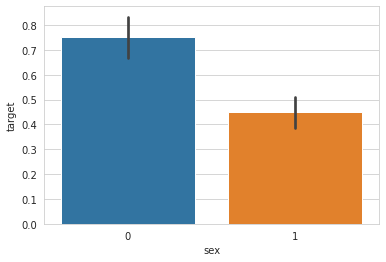

In [6]:
sns.barplot(y = df.target, x=df.sex)

Observations made:

* Males are less likely to have heart dieases.
* Females are more likely to have heart dieases.

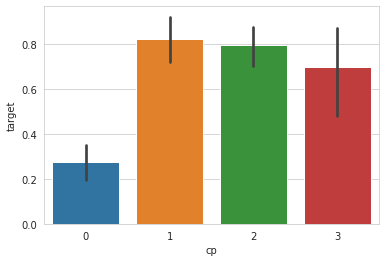

In [7]:
sns.barplot(y= df.target, x=df.cp)

Observations Made:

* Type 1 Chest pains results mostly in heart dieases.
* Type 2 Chest pains results mostly in heart dieases.
* Type 3 Chest pains results mostly in heart dieases.
* Type 0 Chest pains results usually dont cause heart dieases.

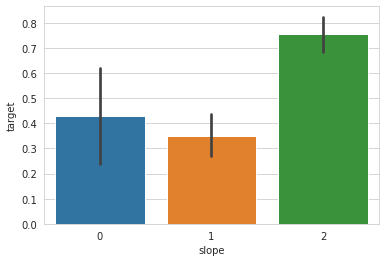

In [8]:
sns.barplot(x = df.slope, y=df.target)

Observations made:

* 0-Upsloping : Less likely to have heart disease.
* 1-Flat : Less likely to have heart disease.
* 2-Downsloping : More likely to have heart disease.

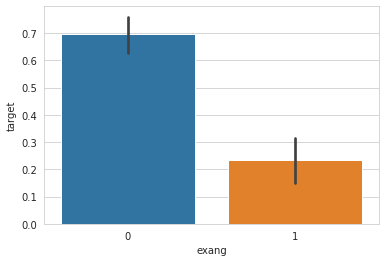

In [9]:
sns.barplot(x = df.exang, y=df.target)

Observations made:

* Women are most likely to have a heart disease if they face pain in the chest during excersise.

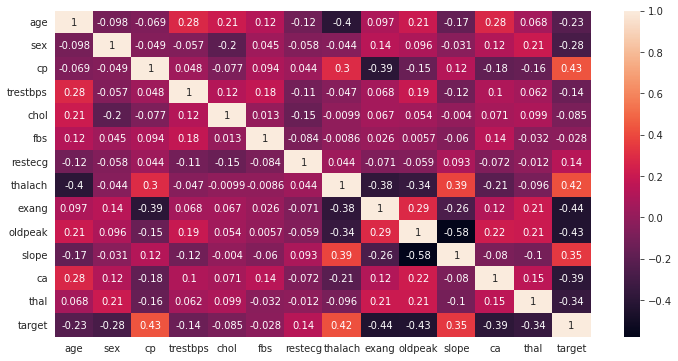

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot= True)

## Data Preparation

In [15]:
X = df.drop('target',axis=1)
y = df['target']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)
pred1 = LR.predict(X_test)
pred1 = pd.DataFrame(pred1,columns = ['Predicted Values'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [36]:
y_test.reset_index(inplace=True)
y_test = pd.DataFrame(y_test)
y_test.drop('index',inplace=True,axis=1)

In [37]:
pred1['Actual Values'] = y_test['target']
pred1

,Predicted Values,Actual Values
0,0,0
1,1,0
2,1,1
3,0,0
4,1,1
...,...,...
56,0,0
57,1,1
58,0,0
59,0,0


In [44]:
y_test.drop('level_0',inplace=True,axis=1)

In [46]:
y_test = np.array(y_test)

In [49]:
from sklearn.metrics import accuracy_score

rmse = accuracy_score(y_test,pred1['Predicted Values'])
rmse*100

88.52459016393442

The accuracy with simple logistic Regression is 88%

In [54]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,pred1['Predicted Values'])
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



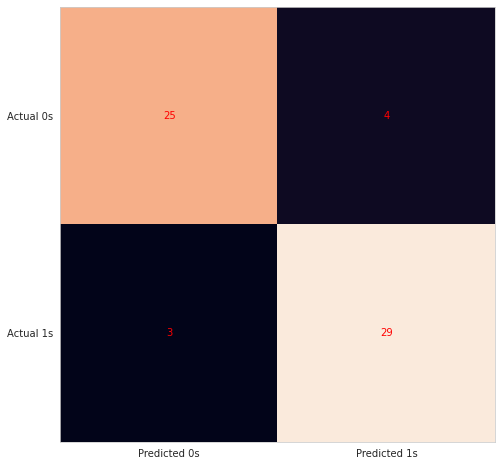

In [87]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred1['Predicted Values'])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [61]:
LR1 = LogisticRegression(solver = 'liblinear')
LR1.fit(X_train,y_train)
pred2 = LR1.predict(X_test)
pred2 = pd.DataFrame(pred2,columns = ['Predicted Values'])

In [62]:
pred2

,Predicted Values
0,0
1,1
2,1
3,0
4,1
...,...
56,0
57,1
58,0
59,0


In [63]:
from sklearn.metrics import accuracy_score

rmse = accuracy_score(y_test,pred2['Predicted Values'])
rmse*100

86.88524590163934

In [64]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,pred2['Predicted Values'])
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



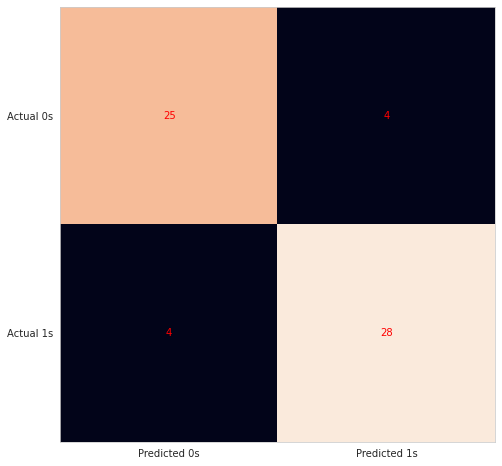

In [85]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred2)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [65]:
LR2 = LogisticRegression(solver = 'sag')
LR2.fit(X_train,y_train)
pred3 = LR2.predict(X_test)
pred3 = pd.DataFrame(pred3,columns = ['Predicted Values'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [66]:
pred3

,Predicted Values
0,0
1,0
2,1
3,0
4,0
...,...
56,0
57,1
58,0
59,0


In [67]:
from sklearn.metrics import accuracy_score

rmse = accuracy_score(y_test,pred3['Predicted Values'])
rmse*100

80.32786885245902

In [69]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,pred3['Predicted Values'])
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



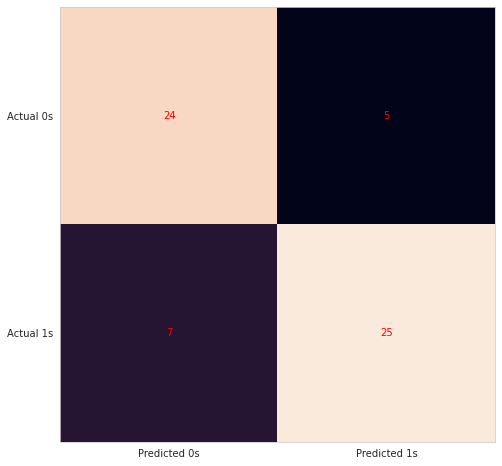

In [84]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [107]:
def LR_model(solver1,C1,penalty1):

  LR = LogisticRegression(solver = solver1, C=C1, penalty=penalty1)
  LR.fit(X_train,y_train)
  y_pred = LR.predict(X_test)
  rmse = accuracy_score(y_test,y_pred)
  cr = classification_report(y_test,y_pred)
  cm = confusion_matrix(y_test,y_pred)
  fig, ax = plt.subplots(figsize=(8, 8))
  ax.imshow(cm)
  ax.grid(False)
  ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
  ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
  ax.set_ylim(1.5, -0.5)
  for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
  plt.show()


  print('Predicted values are:' , y_pred)

  print(cr)
  
  print(rmse*100)

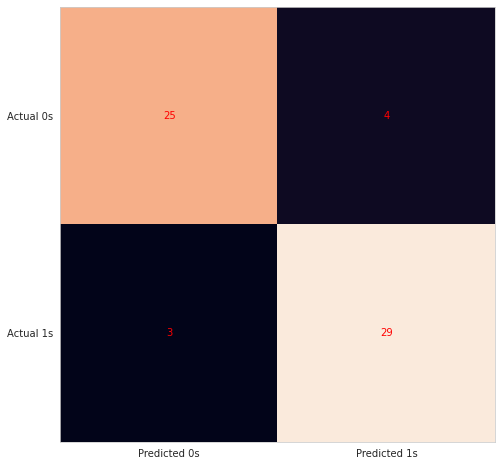

Predicted values are: [0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

88.52459016393442


In [108]:
y_pred4 = LR_model('liblinear',0.5,'l1')

We got a better liblinear model by decreacing the scaling value and penalt

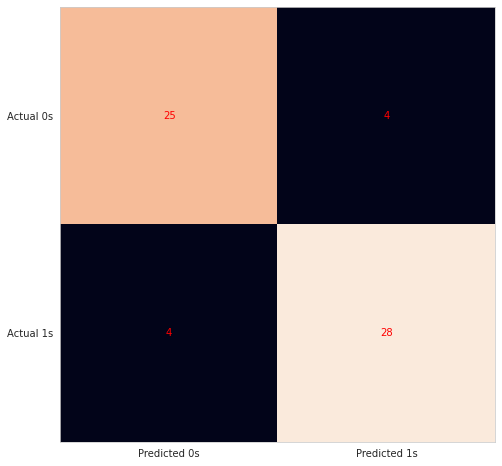

Predicted values are: [0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

86.88524590163934


In [109]:
y_pred5 = LR_model('liblinear',1.5,'l1')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


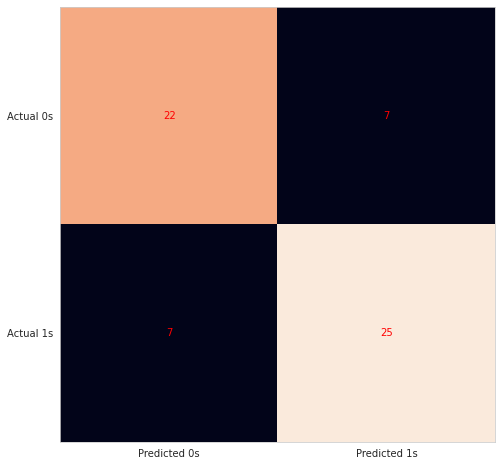

Predicted values are: [0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

77.04918032786885


In [115]:
y_pred6 = LR_model('saga',1,'l1')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


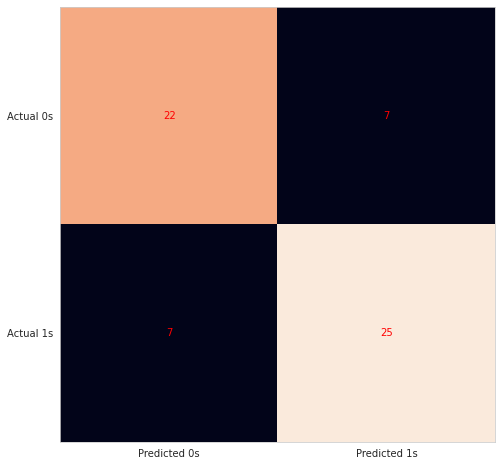

Predicted values are: [0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

77.04918032786885


In [120]:
y_pred6 = LR_model('saga',0.2,'l1')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


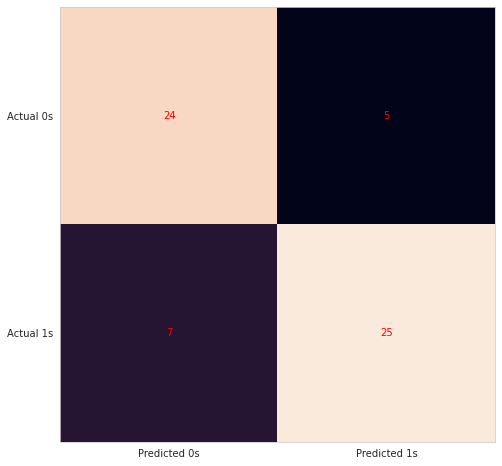

Predicted values are: [0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

80.32786885245902


In [123]:
y_pred7 = LR_model('sag',1,'l2')

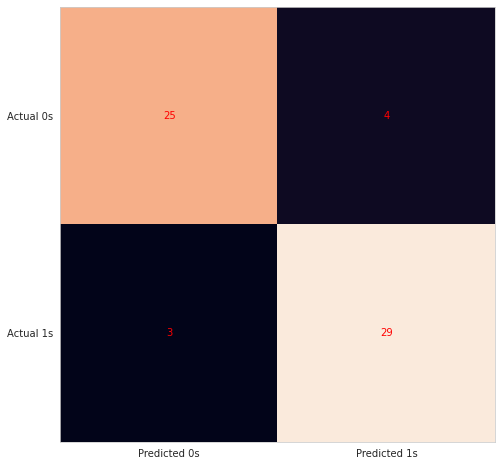

Predicted values are: [0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

88.52459016393442


In [137]:
y_pred5 = LR_model('liblinear',0.4,'l1')

We got the best results with liblinear model of Logistic regression with C=0.4 and penalty of l1